In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import seaborn as sns
pd.set_option('display.max_columns', None)

In [20]:
df_bank = pd.read_csv('bank.csv', sep=';')
df_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [21]:
df_clients = df_bank[df_bank['y']=='yes']
df_clients.reset_index(drop=True, inplace=True)

In [22]:
df_clients

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,1575,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
1,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,1042,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
2,49,technician,married,basic.9y,no,no,no,telephone,may,mon,1467,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
3,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,579,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
4,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,461,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4635,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,208,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
4636,62,retired,married,university.degree,no,no,no,cellular,nov,thu,483,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
4637,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,281,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
4638,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [23]:
# Categorical columns to be encoded
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

# Initialize a dictionary to store mappings
label_mappings = {}

# Apply LabelEncoder to categorical columns and store mappings
for column in categorical_columns:
    label_encoder = LabelEncoder()
    df_clients[column] = label_encoder.fit_transform(df_clients[column])
    label_mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

df_clients

C:\Users\fabri\AppData\Local\Temp\ipykernel_8236\2356444690.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clients[column] = label_encoder.fit_transform(df_clients[column])
C:\Users\fabri\AppData\Local\Temp\ipykernel_8236\2356444690.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clients[column] = label_encoder.fit_transform(df_clients[column])
C:\Users\fabri\AppData\Local\Temp\ipykernel_8236\2356444690.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,41,1,0,0,1,2,0,1,6,1,1575,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,49,2,1,6,1,2,0,1,6,1,1042,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,49,9,1,2,0,0,0,1,6,1,1467,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,41,9,1,5,1,2,0,1,6,1,579,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,45,1,1,2,1,2,0,1,6,1,461,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4635,62,5,1,6,0,2,0,0,7,2,208,1,1,6,2,-1.1,94.767,-50.8,1.031,4963.6,0
4636,62,5,1,6,0,0,0,0,7,2,483,2,6,3,2,-1.1,94.767,-50.8,1.031,4963.6,0
4637,37,0,1,6,0,2,0,0,7,0,281,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
4638,73,5,1,5,0,2,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0


In [24]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clients)

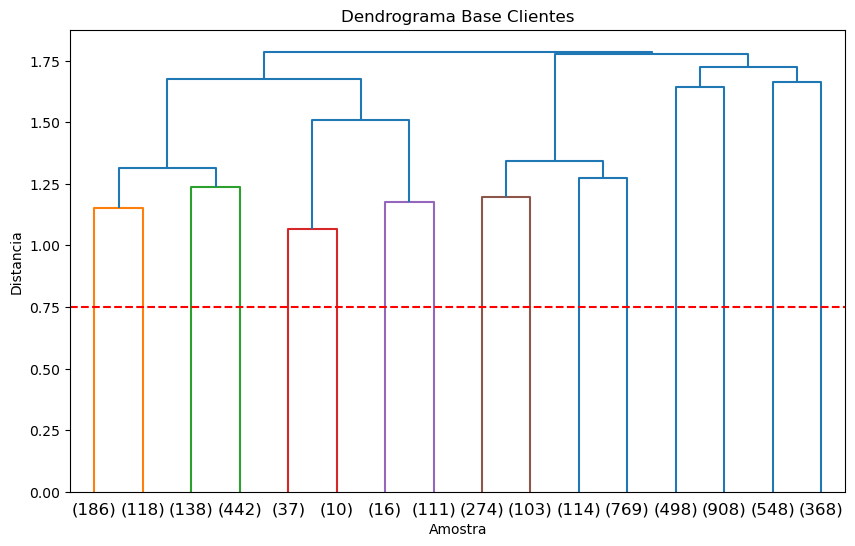

In [25]:
# Calcular a matriz de linkage
linkage_matrix = linkage(scaled_data, method='complete', metric='cosine')

# Plotar o dendrograma
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.title('Dendrograma Base Clientes')
plt.xlabel('Amostra')
plt.ylabel('Distancia')
plt.axhline(y=0.75, color='r', linestyle='--')
plt.show()

In [26]:
# Com base no dendrograma, escolher o número de clusters
chosen_num_clusters = 16

# Realizar o clustering hierárquico com o número escolhido de clusters
from scipy.cluster.hierarchy import fcluster
clusters_hierarchical = fcluster(linkage_matrix, chosen_num_clusters, criterion='maxclust')

In [27]:
df_clients['Clusterização_Hierarquica'] = clusters_hierarchical

df_clients

C:\Users\fabri\AppData\Local\Temp\ipykernel_8236\428697055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clients['Clusterização_Hierarquica'] = clusters_hierarchical


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Clusterização_Hierarquica
0,41,1,0,0,1,2,0,1,6,1,1575,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,4
1,49,2,1,6,1,2,0,1,6,1,1042,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,4
2,49,9,1,2,0,0,0,1,6,1,1467,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,4
3,41,9,1,5,1,2,0,1,6,1,579,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,4
4,45,1,1,2,1,2,0,1,6,1,461,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4635,62,5,1,6,0,2,0,0,7,2,208,1,1,6,2,-1.1,94.767,-50.8,1.031,4963.6,0,1
4636,62,5,1,6,0,0,0,0,7,2,483,2,6,3,2,-1.1,94.767,-50.8,1.031,4963.6,0,1
4637,37,0,1,6,0,2,0,0,7,0,281,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0,14
4638,73,5,1,5,0,2,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0,14


In [28]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(scaled_data)

# Apply KModes clustering
kmodes = KModes(n_clusters=3, init='Huang', n_init=5, verbose=0)
clusters_kmodes = kmodes.fit_predict(scaled_data)

In [29]:
df_clients['Kmodes'] = clusters_kmodes

df_clients.columns

C:\Users\fabri\AppData\Local\Temp\ipykernel_8236\1600324423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clients['Kmodes'] = clusters_kmodes


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'Clusterização_Hierarquica', 'Kmodes'],
      dtype='object')

In [30]:
columns_to_decode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


for column in columns_to_decode:
    original_encoding = {value: key for key, value in label_mappings[column].items()}
    df_clients[column] = df_clients[column].map(original_encoding)


C:\Users\fabri\AppData\Local\Temp\ipykernel_8236\2622748245.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clients[column] = df_clients[column].map(original_encoding)
C:\Users\fabri\AppData\Local\Temp\ipykernel_8236\2622748245.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clients[column] = df_clients[column].map(original_encoding)
C:\Users\fabri\AppData\Local\Temp\ipykernel_8236\2622748245.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [31]:
df_clients

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Clusterização_Hierarquica,Kmodes
0,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,1575,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,4,0
1,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,1042,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,4,0
2,49,technician,married,basic.9y,no,no,no,telephone,may,mon,1467,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,4,0
3,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,579,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,4,0
4,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,461,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4635,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,208,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes,1,0
4636,62,retired,married,university.degree,no,no,no,cellular,nov,thu,483,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes,1,0
4637,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,281,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,14,0
4638,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,14,0


In [33]:
# Selecting the specified columns
selected_columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'contact', 'y']

# Group by hierarchical clustering results
resultado_cluster_hierarquico = df_clients.groupby('Clusterização_Hierarquica')[selected_columns].agg(lambda x: x.mode()[0])

# Group by k-means clustering results
resultado_cluster_kmeans = df_clients.groupby('Kmodes')[selected_columns].agg(lambda x: x.mode()[0])

# Display the results
print("Hierarchical Clustering Results:")
print(resultado_cluster_hierarquico)

print("\nK-Means Clustering Results:")
print(resultado_cluster_kmeans)

Hierarchical Clustering Results:
                           age          job  marital          education  \
Clusterização_Hierarquica                                                 
1                           29       admin.  married  university.degree   
2                           32       admin.  married  university.degree   
3                           35       admin.  married  university.degree   
4                           31       admin.  married  university.degree   
5                           59      retired  married           basic.4y   
6                           33       admin.  married  university.degree   
7                           33  blue-collar  married           basic.9y   
8                           33       admin.  married  university.degree   
9                           33       admin.  married  university.degree   
10                          29       admin.   single  university.degree   
11                          30       admin.   single  university.de